In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pd.set_option("display.max_columns", None)

In [6]:
ny = pd.read_csv('nyc-rolling-sales.csv')
ny.head()

FileNotFoundError: ignored

In [ ]:
ny.tail(7)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,,10309,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,,10309,2,0,2,3020,1800,1997,1,B9,-,2016-12-01 00:00:00
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
#profile = ProfileReport(ny, title="Pandas Profiling Report")

In [ ]:
#profile.to_file("your_report.html")

In [ ]:
ny.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
ny.shape

(84548, 22)

In [ ]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [ ]:
ny.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [ ]:
#simplificando os nomes das colunas
ny.columns = ny.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
ny.building_class_category=ny.building_class_category.str.strip().str.lower().str.replace(' ', '').str.replace('-', '_')

In [ ]:
ny.head()

,unnamed:_0,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,4,1,ALPHABET CITY,07rentals_walkupapartments,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07rentals_walkupapartments,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07rentals_walkupapartments,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07rentals_walkupapartments,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07rentals_walkupapartments,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
ny.isnull().sum()

unnamed:_0                        0
borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease_ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

## Substituindo os códigos dos burgos por seus nomes

In [ ]:
ny['borough'].replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}, inplace=True)

## Investigando os valores únicos de uma coluna
Para investigar todos os valores de uma coluna selecione-a acompanhado do método .unique() 
<p>Para exibir mais de um output no final de uma célula, use a função display() 

In [ ]:
display(ny['ease_ment'].unique())

ny['unnamed:_0'].unique()

array([' '], dtype=object)

array([    4,     5,     6, ..., 26737, 26738, 26739], dtype=int64)

In [ ]:
#apagando essas colunas
ny.drop(columns=['unnamed:_0', 'ease_ment'], inplace=True)

In [ ]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borough                         84548 non-null  object
 1   neighborhood                    84548 non-null  object
 2   building_class_category         84548 non-null  object
 3   tax_class_at_present            84548 non-null  object
 4   block                           84548 non-null  int64 
 5   lot                             84548 non-null  int64 
 6   building_class_at_present       84548 non-null  object
 7   address                         84548 non-null  object
 8   apartment_number                84548 non-null  object
 9   zip_code                        84548 non-null  int64 
 10  residential_units               84548 non-null  int64 
 11  commercial_units                84548 non-null  int64 
 12  total_units                     84548 non-null

In [ ]:
ny.describe().round(2)

,block,lot,zip_code,residential_units,commercial_units,total_units,year_built,tax_class_at_time_of_sale
count,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00
mean,4237.22,376.22,10731.99,2.03,0.19,2.25,1789.32,1.66
std,3568.26,658.14,1290.88,16.72,8.71,18.97,537.34,0.82
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,1322.75,22.00,10305.00,0.00,0.00,1.00,1920.00,1.00
50%,3311.00,50.00,11209.00,1.00,0.00,1.00,1940.00,2.00
75%,6281.00,1001.00,11357.00,2.00,0.00,2.00,1965.00,2.00
max,16322.00,9106.00,11694.00,1844.00,2261.00,2261.00,2017.00,4.00


### Parece que sale_price, gross_sq_ft e land_sq_ft não estão como numéricas

In [ ]:
#vamos investigar mais profundamente
ny.describe(include='all').round(5).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,84548,5,Queens,26736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,84548,254,FLUSHING-NORTH,3068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
building_class_category,84548,47,01onefamilydwellings,18235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax_class_at_present,84548,11,1,38633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
block,84548,NaN,NaN,NaN,4237.22,3568.26,1,1322.75,3311,6281,16322
lot,84548,NaN,NaN,NaN,376.224,658.137,1,22,50,1001,9106
building_class_at_present,84548,167,D4,12663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,84548,67563,131-05 40TH ROAD,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apartment_number,84548,3989,,65496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,84548,NaN,NaN,NaN,10732,1290.88,0,10305,11209,11357,11694


>> Observações
<li> Não só sale_price, land_sq_ft e gross_sq_ft não estão como números, como apresentam '-' como o valor mais frequente.
    Precisamos converte eles em números e escolher uma estratégia para lidar com os dados faltantes
<li> Nenhumas das datas está como datetime.
<li> Não temos nenhuma categórica representada como tal.    

In [ ]:
ny['sale_price'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [ ]:
ny['sale_price'] = pd.to_numeric(ny['sale_price'], errors='coerce')
ny['sale_price'].unique()

array([ 6625000.,       nan,  3936272., ...,   408092., 11693337.,
          69300.])

### Convertendo colunas em numéricas.

In [ ]:
ny['sale_price'] = pd.to_numeric(ny['sale_price'], errors='coerce')
ny['land_square_feet'] = pd.to_numeric(ny['land_square_feet'], errors='coerce')
ny['gross_square_feet'] = pd.to_numeric(ny['gross_square_feet'], errors='coerce')

### Substituindo '  ' por None em apartment_number

In [ ]:
ny['apartment_number'].value_counts()

         65496
4          298
3A         295
2          275
3B         275
         ...  
43085        1
17FL         1
P92          1
A1E          1
PS 60        1
Name: apartment_number, Length: 3989, dtype: int64

In [ ]:
ny['apartment_number'] = ny['apartment_number'].replace(' ', np.nan)

In [ ]:
display('NULLs:', ny['apartment_number'].isnull().sum())
ny['apartment_number'].value_counts()

'NULLs:'

65496

4        298
3A       295
3B       275
2        275
2B       272
        ... 
17FL       1
P92        1
A1E        1
A 2        1
PS 60      1
Name: apartment_number, Length: 3988, dtype: int64

### Apartment Number não segue um padrão, além de terem muitos dados faltantes.
É melhor droparmos.

In [ ]:
ny.drop(columns='apartment_number', inplace=True)

### Convertendo data para datetime

In [ ]:
ny['sale_date'] = pd.to_datetime(ny['sale_date'])

## <b>Hora de converter as categóricas</b>

In [ ]:
ny.nunique()

borough                               5
neighborhood                        254
building_class_category              47
tax_class_at_present                 11
block                             11566
lot                                2627
building_class_at_present           167
address                           67563
zip_code                            186
residential_units                   176
commercial_units                     55
total_units                         192
land_square_feet                   6061
gross_square_feet                  5690
year_built                          158
tax_class_at_time_of_sale             4
building_class_at_time_of_sale      166
sale_price                        10007
sale_date                           364
dtype: int64

### Convertendo categóricas
<li> Mas primeiro vamos resgatar o que significam

#### tax_class

In [ ]:
ny['tax_class_at_present'].sort_values().unique()

NameError: ignored

In [ ]:
ny['tax_class_at_present'].sort_values().value_counts()

In [ ]:
display(ny['tax_class_at_time_of_sale'].sort_values().unique())
ny['tax_class_at_present'].sort_values().unique()

In [ ]:
ny['tax_class_at_present'] = ny['tax_class_at_present'].replace(' ', np.nan)

In [ ]:
# observando que as colunas de tax_class apresentam espaços em branco (' '), vamos substituílos por NaN. Ao final rode a célula acima para ver o resultado
ny['tax_class_at_time_of_sale'] = ny['tax_class_at_time_of_sale'].replace(' ', np.nan).apply(str)
ny['tax_class_at_present'] = ny['tax_class_at_present'].replace(' ', np.nan) 

Os valores foram subdivididos. O dicionário de dados trata apenas das classes e não das subclasses. 
<p>Pesquisando, encontramos as subclasses 2, 2A, 2B, 2C, em https://www1.nyc.gov/site/finance/taxes/definitions-of-property-assessment-terms.page. 
<p>Então vamos criar o nosso dicionário subistituir os códigos e transformar o dtype em categoria.

In [ ]:
ny_txclass_dict = {'1': 'Mostly Res buildings up to 3 Units', 
                   '1B': 'Mostly Res buildings up to 3 Units', 
                   '1C': 'Mostly Res buildings up to 3 Units',
                   '2': 'Primarily Res 11+ Units',
                   '2A': 'Primarily Res 4 - 6 Rent',
                   '2B': 'Primarily Res 7 - 10 Rent',
                   '2C': 'Primarily Res 2 - 10 Coop / Cond',
                   '3': 'Utility property',
                   '4': 'Com, Ind, Fact, Office and Others'            
                  }

In [ ]:
ny['tax_class_at_time_of_sale'] = ny['tax_class_at_time_of_sale'].replace(ny_txclass_dict).astype('category')
ny['tax_class_at_present'] = ny['tax_class_at_present'].replace(ny_txclass_dict).astype('category')

#### building_class


In [ ]:
display('_building_class_at_present:', ny['building_class_at_present'].sort_values().unique())
display('_building_class_at_time_of_sale:', ny['building_class_at_time_of_sale'].sort_values().unique())

NameError: ignored

#### Essas variáveis são pouco ou nada intuitivas...
Por sorte temos o que elas significam no site https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html
<p>Melhor que isso, podemos importar a tabela, ler como DataFrame e converter em dicionário para passar como parâmetro no replace.

In [ ]:
ny_building_class = pd.read_html('https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html')[0] #selecionando o primeiro elemento da lista (que contém o dataframe)
ny_building_class.set_index(['Building Code', 'Description'])
ny_bclass = ny_building_class.to_dict('split') #separando o índex, nome das colundas e os dados em listas
ny_lists = ny_bclass.get('data') #selecionando apenas a lista de listas dos dados
ny_dict = {k[0]: k[1] for k in ny_lists} # dict comprehension para transformar a lista de listas em dicionário
display(len(ny_dict)) #mostrando a quantidade de itens do dicionário
ny_dict

NameError: ignored

### Substituindo os códigos e transformando os dtypes em category em uma só linha

In [ ]:
ny['building_class_at_present'] = ny['building_class_at_present'].replace(ny_dict).astype('category')
ny['building_class_at_time_of_sale'] = ny['building_class_at_time_of_sale'].replace(ny_dict).astype('category')

### Vamos transformar o zip_code em categórica já que não faz sentido fazermos operações algébricas (+, - ,* ,/)  ou agregações de valores (mean, std)  

In [ ]:
ny['zip_code'] = ny['zip_code'].apply(str).astype('category')

### Continuando, vamos converter em categóricas

In [ ]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         84548 non-null  object        
 1   neighborhood                    84548 non-null  object        
 2   building_class_category         84548 non-null  object        
 3   tax_class_at_present            83810 non-null  category      
 4   block                           84548 non-null  int64         
 5   lot                             84548 non-null  int64         
 6   building_class_at_present       84548 non-null  category      
 7   address                         84548 non-null  object        
 8   zip_code                        84548 non-null  category      
 9   residential_units               84548 non-null  int64         
 10  commercial_units                84548 non-null  int64         
 11  to

### Agora temos um dataset mais verdadeiro.

In [ ]:
ny.describe(include='all').round(5).T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
borough,84548,5,Queens,26736,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,84548,254,FLUSHING-NORTH,3068,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
building_class_category,84548,47,01onefamilydwellings,18235,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax_class_at_present,83810,8,Mostly Res buildings up to 3 Units,40053,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
block,84548,NaN,NaN,NaN,NaT,NaT,4237.22,3568.26,1,1322.75,3311,6281,16322
lot,84548,NaN,NaN,NaN,NaT,NaT,376.224,658.137,1,22,50,1001,9106
building_class_at_present,84548,167,ELEVATOR COOPERATIVE,12663,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,84548,67563,131-05 40TH ROAD,210,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,84548,186,10314,1687,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residential_units,84548,NaN,NaN,NaN,NaT,NaT,2.02526,16.721,0,0,1,2,1844


### Algumas colunas estão com o nome muito grande, o que pode diminuir a nossa agilidade. 
<lo> É hora de mudá-las

In [ ]:
#extraindo os nomes
ny.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

In [ ]:
#criando um dicionário em cima das variáveis a serem mudadas
ny.rename(columns = {'building_class_category': 'build_clss_cat',
       'tax_class_at_present': 'tx_class_now', 'building_class_at_present': 'building_class_now', 
       'land_square_feet':  'land_sq_ft', 'gross_square_feet': 'gross_sq_ft', 'tax_class_at_time_of_sale': 'tx_class_at_sale',
       'building_class_at_time_of_sale': 'building_class_at_sale'}, inplace=True)

In [ ]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   borough                 84548 non-null  object        
 1   neighborhood            84548 non-null  object        
 2   build_clss_cat          84548 non-null  object        
 3   tx_class_now            83810 non-null  category      
 4   block                   84548 non-null  int64         
 5   lot                     84548 non-null  int64         
 6   building_class_now      84548 non-null  category      
 7   address                 84548 non-null  object        
 8   zip_code                84548 non-null  category      
 9   residential_units       84548 non-null  int64         
 10  commercial_units        84548 non-null  int64         
 11  total_units             84548 non-null  int64         
 12  land_sq_ft              58296 non-null  float6

### <b> Vamos explorar o nosso df graficamente </b>


#### Vamos começar com uma linha na biblioteca matplotlib 

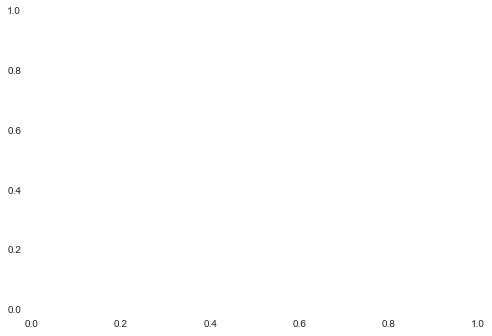

In [ ]:
# Essas linhas de código criam a moldura e a exibem. Agora vamos recheá-la com os dados que quermos visualizar.
fig, ax = plt.subplots()
plt.show()

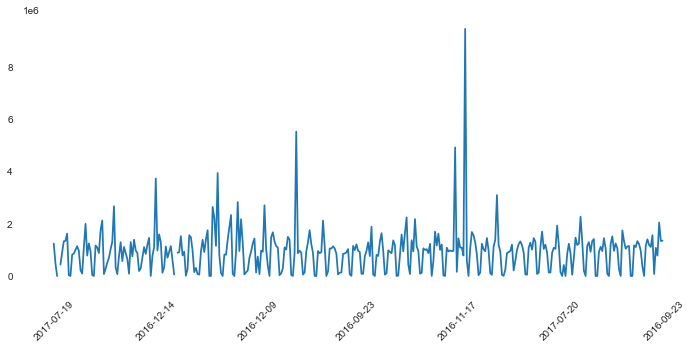

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([12, 5])
#vamos entender como foi a média mensal de imóveis durante o período de um ano registrado.
#quando plotamos com matplotlib, tudo é manual, até informar a ordem das datas, é necessário.
ax.plot(ny['sale_date'].sort_values().unique(), ny['sale_price'].groupby(ny.sale_date).mean())
ax.set_xticklabels(ny.sale_date.dt.date, rotation=45)
plt.show()

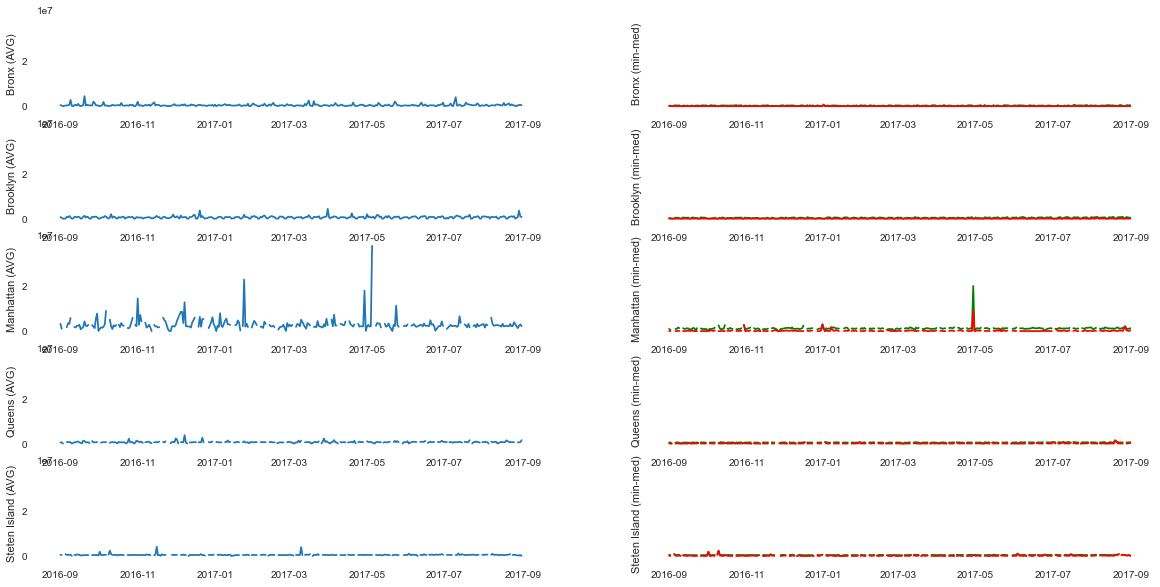

In [ ]:
# vamos plotar uma matriz de gráficos: 1 com a média de cada região da cidade, seguido de sua mínima e sua máxima 
# para ser possível compara, vamos manter o mesmo y para todos os gráficos
fig, ax = plt.subplots(5, 2, sharey=True)
fig.set_size_inches([20, 10])

### Bronx
ax[0,0].set_ylabel('Bronx (AVG)')
ny_bronx = ny[ny['borough']== 'Bronx']
#média
ax[0,0].plot(ny_bronx['sale_date'].sort_values().unique(), ny_bronx['sale_price'].groupby(ny.sale_date).mean())
#mediana
ax[0,1].set_ylabel('Bronx (min-med)')
ax[0,1].plot(ny_bronx['sale_date'].sort_values().unique(), ny_bronx['sale_price'].groupby(ny.sale_date).median(), c='g')
#mínima
ax[0,1].plot(ny_bronx['sale_date'].sort_values().unique(), ny_bronx['sale_price'].groupby(ny.sale_date).min(), c='r')


### Brooklyn
ax[1,0].set_ylabel('Brooklyn (AVG)')
ny_Brooklyn = ny[ny['borough']== 'Brooklyn']
#média
ax[1,0].plot(ny_Brooklyn['sale_date'].sort_values().unique(), ny_Brooklyn['sale_price'].groupby(ny.sale_date).mean())
#mediana
ax[1,1].set_ylabel('Brooklyn (min-med)')
ax[1,1].plot(ny_Brooklyn['sale_date'].sort_values().unique(), ny_Brooklyn['sale_price'].groupby(ny.sale_date).median(), c='g')
#mínima
ax[1,1].plot(ny_Brooklyn['sale_date'].sort_values().unique(), ny_Brooklyn['sale_price'].groupby(ny.sale_date).min(), c='r')


### Manhattan
ny_manhattan = ny[ny['borough']== 'Manhattan']
ax[2,0].set_ylabel('Manhattan (AVG)')
ax[2,0].plot(ny_manhattan['sale_date'].sort_values().unique(), ny_manhattan['sale_price'].groupby(ny.sale_date).mean())
#mediana
ax[2,1].set_ylabel('Manhattan (min-med)')
ax[2,1].plot(ny_manhattan['sale_date'].sort_values().unique(), ny_manhattan['sale_price'].groupby(ny.sale_date).median(), c='g')
#mínima
ax[2,1].plot(ny_manhattan['sale_date'].sort_values().unique(), ny_manhattan['sale_price'].groupby(ny.sale_date).min(), c='r')


### Queens
ny_queens = ny[ny['borough']== 'Queens']
ax[3,0].set_ylabel('Queens (AVG)')
ax[3,0].plot(ny_queens['sale_date'].sort_values().unique(), ny_queens['sale_price'].groupby(ny.sale_date).mean())
#mediana
ax[3,1].set_ylabel('Queens (min-med)')
ax[3,1].plot(ny_queens['sale_date'].sort_values().unique(), ny_queens['sale_price'].groupby(ny.sale_date).median(), c='g')
#mínima
ax[3,1].plot(ny_queens['sale_date'].sort_values().unique(), ny_queens['sale_price'].groupby(ny.sale_date).min(), c='r')


### Staten Island
ny_staten = ny[ny['borough']== 'Staten Island']
ax[4,0].set_ylabel('Steten Island (AVG)')
ax[4,0].plot(ny_staten['sale_date'].sort_values().unique(), ny_staten['sale_price'].groupby(ny.sale_date).mean())
#mediana
ax[4,1].set_ylabel('Steten Island (min-med)')
ax[4,1].plot(ny_staten['sale_date'].sort_values().unique(), ny_staten['sale_price'].groupby(ny.sale_date).median(), c='g')
#mínima
ax[4,1].plot(ny_staten['sale_date'].sort_values().unique(), ny_staten['sale_price'].groupby(ny.sale_date).min(), c='r')


#vamos entender como foi a média mensal de imóveis durante o período de um ano registrado.
#quando plotamos com matplotlib, tudo é manual, até informar a ordem das datas, é necessário.

plt.show()

#### Olhando para esse gráfico dá para perceber 3 coisas e pensar uma quarta:
<li> Os dados são referentes as vendas de imóveis entre setembro de 2016 e agosto de 2017;
<li> Os preços médios medianos e mínimos em Manhattan são muito maiores que os dos demais boroughs;
<li> Cada região tem uma dinâmica própria;   
<li> Se eu tiver que escrever tudo isso de código a cada análise, vou trabalhar nesse dataset para sempre.
<p> Calma. O Matplotlib é especialmente importante por sua performance e por seu nível de detalhamento em criar EXATAMENTE a visualização que você quiser, mas existem bibliotecas que são bem mais concisas para ganharmos agilidade nas nossas análises.    


### Seaborn
Para se ter uma ideia de como funciona essa biblioteca, vamos plotar um histograma em matplotlib e um gráfico de distribuição em seaborn

(array([6.9700e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 3.8000e+01, 7.7539e+04]),
 array([   0. ,  201.7,  403.4,  605.1,  806.8, 1008.5, 1210.2, 1411.9,
        1613.6, 1815.3, 2017. ]),
 <a list of 10 Patch objects>)

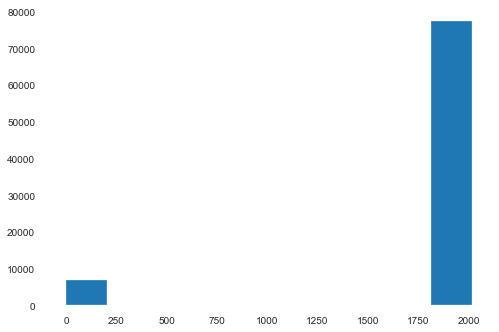

In [ ]:
fig, ax = plt.subplots()
ax.hist(ny['year_built'])

Perceba que mesmo com 30 bins, é muito dificil ter uma ideia qualquer sobre como os dados se comportam.
<p> Agora vamos o distplot do seaborn. Ele mostra onde está a concentração dos dados sem que tenhamos que ficar tentando adivinhar.<p>
    É muito mais simples e nos dá confiança para tomar decisões que precisamos tomar.

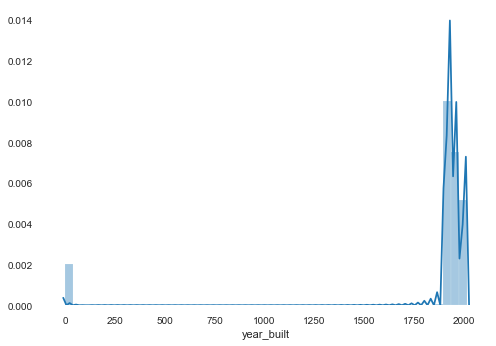

In [ ]:
ax = sns.distplot(ny['year_built'])

In [ ]:
(ny['year_built']== 0).value_counts()

False    77578
True      6970
Name: year_built, dtype: int64

### vamos preencher os anos faltantes com a mediana de cada borough

In [ ]:
ny[['borough','year_built','neighborhood', 'address', 'sale_price']].groupby(['borough']).median()

,year_built,sale_price
borough,,
Bronx,1932,270000.0
Brooklyn,1930,420000.0
Manhattan,1938,1150000.0
Queens,1945,495000.0
Staten Island,1973,465000.0


In [ ]:
ny['year_built'][ny['borough'] == 'Bronx'] = ny['year_built'][ny['borough'] == 'Bronx'].replace({0: 1932}).astype('int64')
ny['year_built'][ny['borough'] == 'Brooklyn'] = ny['year_built'][ny['borough'] == 'Brooklyn'].replace({0: 1930}).astype('int64')
ny['year_built'][ny['borough'] == 'Manhattan'] = ny['year_built'][ny['borough'] == 'Manhattan'].replace({0: 1938}).astype('int64')
ny['year_built'][ny['borough'] == 'Queens'] = ny['year_built'][ny['borough'] == 'Queens'].replace({0: 1945}).astype('int64')
ny['year_built'][ny['borough'] == 'Staten Island'] = ny['year_built'][ny['borough'] == 'Staten Island'].replace({0: 1973}).astype('int64')

<ipython-input-53-1d04fe31f597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny['year_built'][ny['borough'] == 'Bronx'] = ny['year_built'][ny['borough'] == 'Bronx'].replace({0: 1932}).astype('int64')


### Vamos substituir a data dessas duas linhas do dataset

In [ ]:
ny['year_built'][ny['year_built'] < 1800] = ny['year_built'][ny['year_built'] < 1800].replace({1111: 1900, 1680: 1810})

False    84548
Name: year_built, dtype: int64

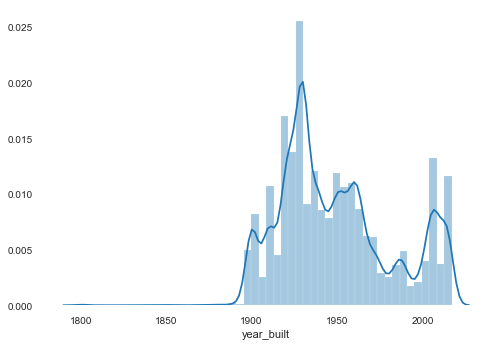

In [ ]:
#substituindo os zeros e as duas linhas isoladas antes de 1800
display((ny['year_built']== 0).value_counts())
ax = sns.distplot(ny['year_built'])

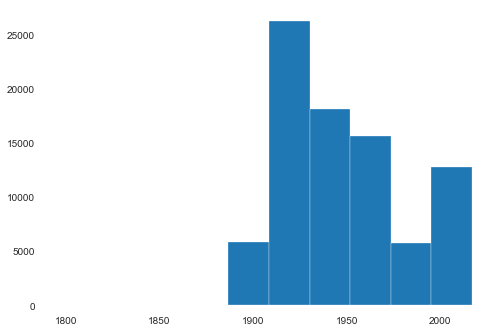

In [ ]:
ax = plt.hist(ny['year_built'])

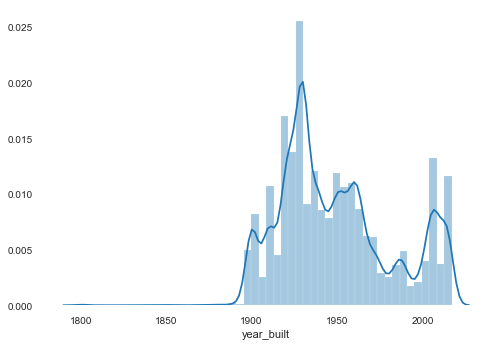

In [ ]:
ax = sns.distplot(ny['year_built'])

### Precisamos adotar uma medida drástica: Apagar as linhas com preços de venda vazios
como uma das nossas principais análises é sobre os preços substituir esses valores pode enviesar a análise.
<li> vamos abrir mão de mais de 17% dos nossos dados.

In [ ]:
(ny['sale_price'].isnull()).value_counts(normalize=True)

False    0.827778
True     0.172222
Name: sale_price, dtype: float64

In [ ]:
ny.dropna(subset=['sale_price'], inplace=True)

### Comparando Seaborn com Matplotlib em um gráfico.

#### Scatterplot com Matplotlib

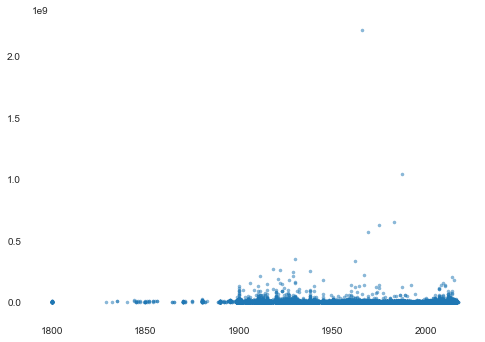

In [ ]:
fig, ax = plt.subplots()
ax = plt.scatter(ny['year_built'], ny['sale_price'], alpha=0.5, s=10)

Ok. Esse até pareceu simples... agora imagine se quiséssemos separar as regiões por cores...
<p><b> Com Seaborn isso é muiiiito mais simples!!! </b>

#### Scatterplot com Seaborn

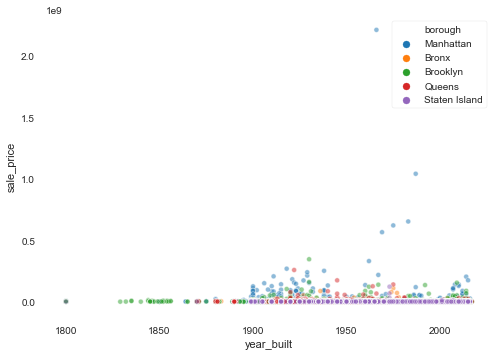

In [ ]:
# basta passar a coluna que você desejar como hue e ele automaticamente incorpora cores e uma legenda
sns.scatterplot(x='year_built', y='sale_price', data=ny, alpha=0.5, hue='borough', s=25)

##### Melhor que isso, vamos criar um gráfico para cada região, passando um <b>ÚNICO</b> argumento!
Ok.. é um tipo de gráfico específico para relacionar variáveis. Mas são DOIS argumentos...

#### Relplot com Seaborn

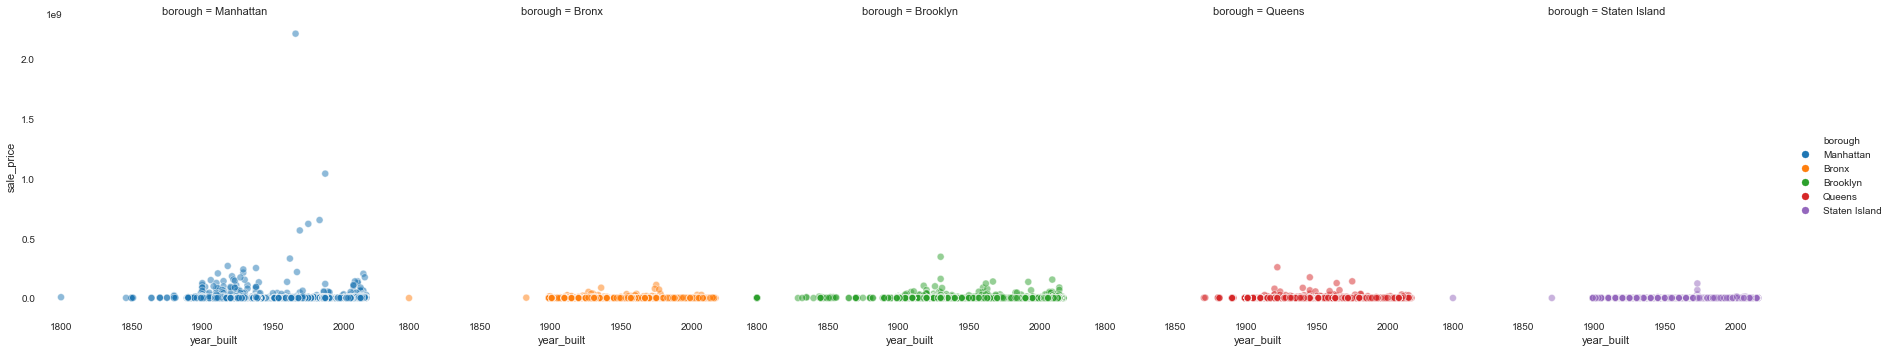

In [ ]:
# O relplot aceita dois kinds "scatter" ou "line" e para alterar, basta mudar um parâmetro
# Para criar subplots, podemos usar tanto o argumento col, quanto row 
sns.relplot(x='year_built', y='sale_price', data=ny, alpha=0.5, kind='scatter', col='borough', hue='borough')

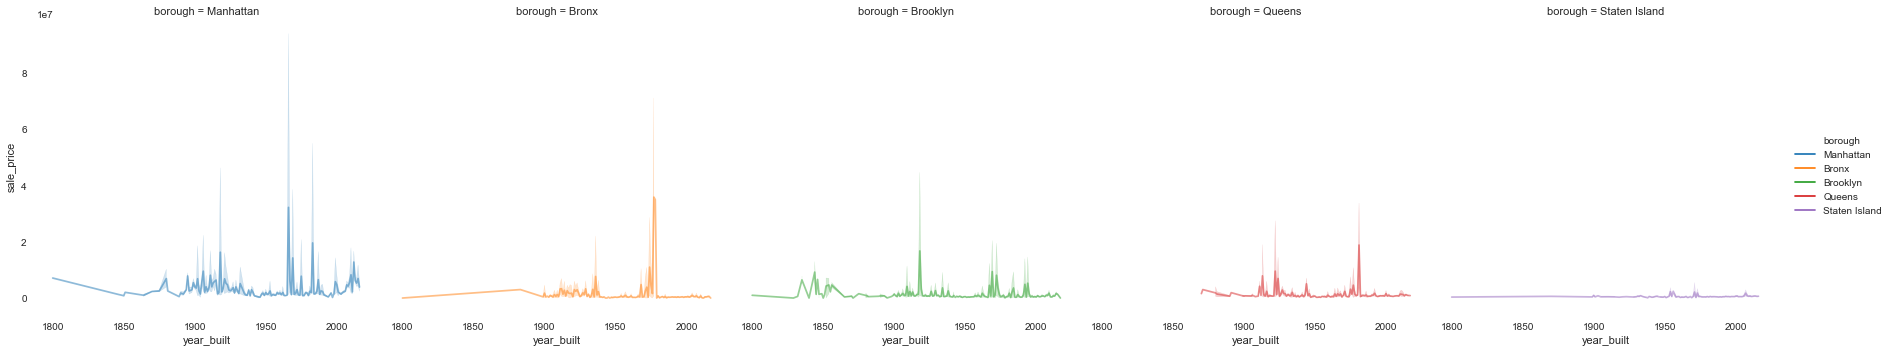

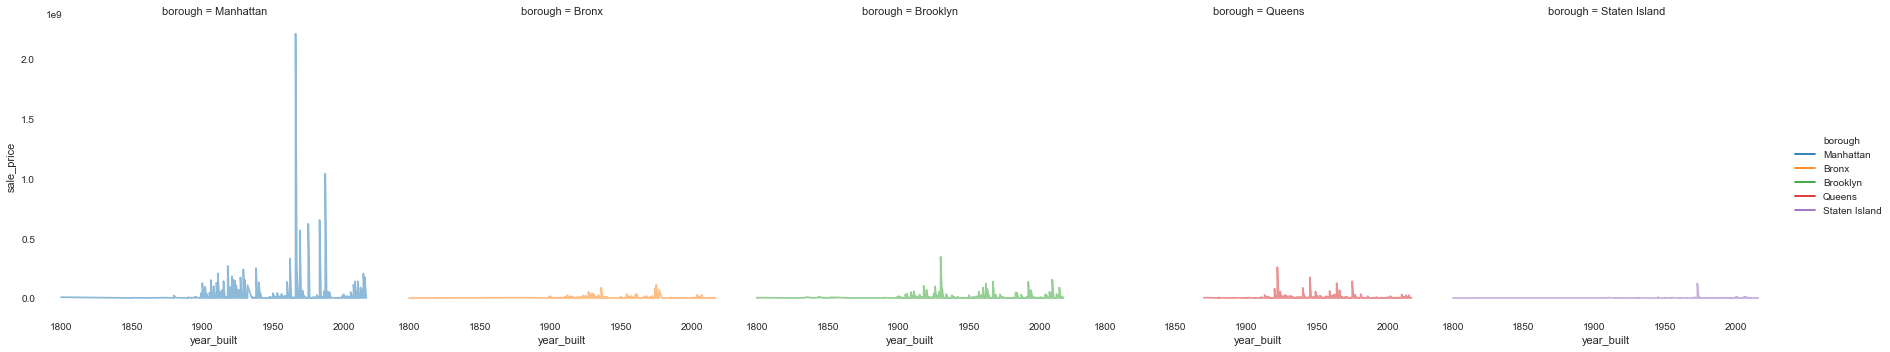

In [ ]:
# Um ponto importante sobre o seaborn é que, nos gráficos de linhas, ele está sempre passando amostras aleatórias com um intervalo de confiança de 95% 
display(sns.relplot(x='year_built', y='sale_price', data=ny, alpha=0.5, kind='line', col='borough', hue='borough'))

# Se quisermos desativar o estimador e plotar todos os dados, precisamos indicar isso.  
sns.relplot(x='year_built', y='sale_price', data=ny, alpha=0.5, kind='line', col='borough', hue='borough', estimator=None)

### Recuperando o foco.
<li> Os gráficos são muito legais, mas o propósito deles é nos ajudar a fazer análises.
<li> Lembrando dos scatterplots, tínhamos uma concentração no valor das vendas de imóveis construídos entre 1900 - 1950 e a partir de 2000
<li> Vimos que essa dinâmica muda de acordo com a região e que Manhattan concentra com maior preço de venda, não importa o ano da construção
<li> Imóveis dos anos 70 e 80 aparentemente tiveram uma alta de preço no Bronx e no Queens
<li> Entendemos melhor as dinâmicas de preços dos imóveis vendidos entre 2016 e 2017. Mas e a quantidade?

### Vamos investigar a quantidade de imóveis vendidos por região

### Catplot()

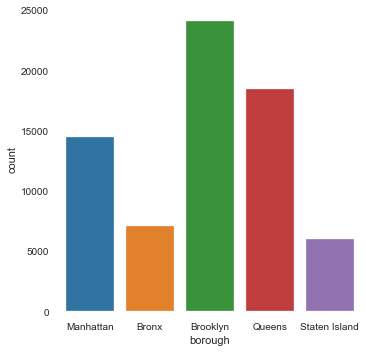

In [ ]:
# Se você passar apenas um argumento e setar o kind para 'count', ele vira um countplot ()
sns.catplot(x='borough', data=ny, kind='count')

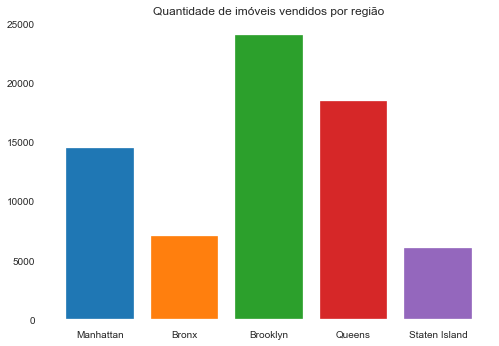

In [ ]:
# Não desista do Matplotlib!
#obs.: Eu tive que ajustar a ordem para que tivessem a mesma cor já usada no dataset. O Seaborn faz isso automaticamente.
fig, ax = plt.subplots()
ax.bar("Manhattan", ny[ny['borough'] == 'Manhattan']['borough'].value_counts())
ax.bar("Bronx", ny[ny['borough'] == 'Bronx']['borough'].value_counts())
ax.bar("Brooklyn", ny[ny['borough'] == 'Brooklyn']['borough'].value_counts())
ax.bar("Queens", ny[ny['borough'] == 'Queens']['borough'].value_counts())
ax.bar("Staten Island", ny[ny['borough'] == 'Staten Island']['borough'].value_counts())
ax.set_title('Quantidade de imóveis vendidos por região')

plt.show()

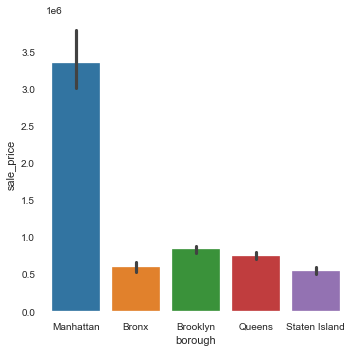

In [ ]:
# Mas quando plotamos o preço vs a região fica clara a discrepância. 
sns.catplot(x='borough', y='sale_price', data=ny, kind='bar')

Ao mesmo tempo, nos acende uma luz vermelha. 
<br>Essa barrinha no topo de cada região é o intervalo de confiança.
<br>Veja que ela é muito maior em Manhattan do que nas demais regiões.
<br><br>
Podemos investigar trocando o intervalo de confiança pelo desvio padrão.

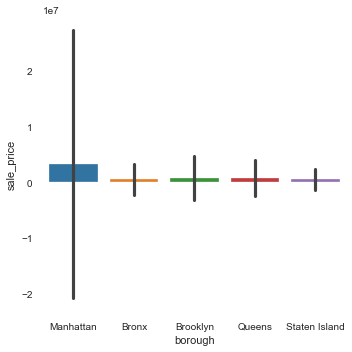

In [ ]:
 sns.catplot(x='borough', y='sale_price', data=ny, kind='bar', ci='sd')

Ok! Isso não é muito intuitivo.. o que isso significa?

### Boxplot
Talvez esse seja o gráfico que melhor explique a distribuição dos dados dentro de uma variável

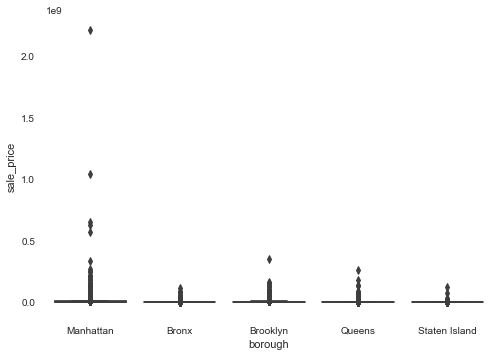

In [ ]:
 sns.boxplot(x='borough', y='sale_price', data=ny)

#### Isso mesmo! Os preços em Manhattan são tão absurdamente altos que os 95% dos dados cabem todos em uma linha.
Precisamos criar um recorte para podermos entender e comparar o comportamento dos dados.

### Quantos imóveis existem com valor acima de U$ 100.000.000.000?

In [ ]:
print('Manhattan:', len(ny[(ny.borough == 'Manhattan') & (ny.sale_price > 100000000)]), end='\n')
print('Bronx:', len(ny[(ny.borough == 'Bronx') & (ny.sale_price > 100000000)]), end='\n')
print('Brooklyn:', len(ny[(ny.borough == 'Brooklyn') & (ny.sale_price > 100000000)]),end='\n')
print('Queens:', len(ny[(ny.borough == 'Queens') & (ny.sale_price > 100000000)]),end='\n')
print('Staten Island:', len(ny[(ny.borough == 'Staten Island') & (ny.sale_price > 100000000)]), end='\n')

Manhattan: 35
Bronx: 1
Brooklyn: 7
Queens: 4
Staten Island: 1


#### Será que existe algo de errado com eles?

In [ ]:
ny[ny.sale_price > 100000000]

,borough,neighborhood,build_clss_cat,tx_class_now,block,lot,building_class_now,address,zip_code,residential_units,commercial_units,total_units,land_sq_ft,gross_sq_ft,year_built,tx_class_at_sale,building_class_at_sale,sale_price,sale_date
931,Manhattan,CHELSEA,21officebuildings,"Com, Ind, Fact, Office and Others",801,24,OFFICE ONLY 7 - 19 STORIES,119 WEST 25TH STREET,10001,0,13,13,9875.0,113062.0,1906,"Com, Ind, Fact, Office and Others",OFFICE ONLY 7 - 19 STORIES,1.500000e+08,2016-12-16
941,Manhattan,CHELSEA,22storebuildings,"Com, Ind, Fact, Office and Others",773,1,MULTI-STORY RETAIL BUILDING (2 OR MORE),258 8 AVENUE,10011,0,4,4,19750.0,39500.0,1932,"Com, Ind, Fact, Office and Others",MULTI-STORY RETAIL BUILDING (2 OR MORE),1.072500e+08,2017-08-08
950,Manhattan,CHELSEA,25luxuryhotels,"Com, Ind, Fact, Office and Others",801,71,LUXURY HOTEL,152 WEST 26TH STREET,10001,0,1,1,9826.0,122236.0,2010,"Com, Ind, Fact, Office and Others",LUXURY HOTEL,1.397250e+08,2016-12-05
1122,Manhattan,CIVIC CENTER,07rentals_walkupapartments,Primarily Res 7 - 10 Rent,175,19,WALK-UP APT. OVER SIX FAMILIES WITH STORES,41 WHITE STREET,10013,7,1,8,2633.0,12000.0,1915,Primarily Res 11+ Units,WALK-UP APT. OVER SIX FAMILIES WITH STORES,1.415000e+08,2017-07-13
2046,Manhattan,FASHION,21officebuildings,"Com, Ind, Fact, Office and Others",784,64,OFFICE WITH COMM 7 - 19 STORIES,240 WEST 35TH STREET,10001,0,35,35,9875.0,145372.0,1924,"Com, Ind, Fact, Office and Others",OFFICE WITH COMM 7 - 19 STORIES,1.080000e+08,2016-12-20
2050,Manhattan,FASHION,21officebuildings,"Com, Ind, Fact, Office and Others",833,11,OFFICE ONLY WITH OR WITHOUT COMM - 20 STORIES ...,1250 BROADWAY,10001,0,55,55,30750.0,645977.0,1969,"Com, Ind, Fact, Office and Others",OFFICE ONLY WITH OR WITHOUT COMM - 20 STORIES ...,5.650000e+08,2016-11-01
2064,Manhattan,FASHION,25luxuryhotels,"Com, Ind, Fact, Office and Others",760,18,FULL SERVICE HOTEL,341 WEST 36TH STREET,10018,0,1,1,7406.0,81000.0,2007,"Com, Ind, Fact, Office and Others",FULL SERVICE HOTEL,1.055927e+08,2017-08-16
2066,Manhattan,FASHION,25luxuryhotels,"Com, Ind, Fact, Office and Others",763,28,FULL SERVICE HOTEL,311 WEST 39TH STREET,10018,0,1,1,7406.0,177000.0,2010,"Com, Ind, Fact, Office and Others",FULL SERVICE HOTEL,1.281778e+08,2016-09-29
2067,Manhattan,FASHION,25luxuryhotels,"Com, Ind, Fact, Office and Others",806,76,LUXURY HOTEL,371 7 AVENUE,10001,529,9,538,19011.0,473391.0,1929,"Com, Ind, Fact, Office and Others",LUXURY HOTEL,2.125000e+08,2016-12-20
2068,Manhattan,FASHION,25luxuryhotels,"Com, Ind, Fact, Office and Others",837,6,FULL SERVICE HOTEL,63-67 WEST 35TH STREET,10001,0,1,1,7406.0,122859.0,2008,"Com, Ind, Fact, Office and Others",FULL SERVICE HOTEL,1.396575e+08,2016-12-05


### Parece estar tudo normal com esses dados. 
Mais que isso, são imóveis tão exclusivos que é possível pesquisar na internet para atualizar os dados faltantes.
<br> Mas não vamos fazer isso. É melhor criarmos um select nos dados para entendermos melhor a distribuição dos valores (a pesar desses hiper outliers) 

In [ ]:
# Investigando valores abaixo de 30000000, acima de 5MM, tudo o que é outlier em Manhattan.
# tendo isso em mente, podemos setar nosso recorte e analizar o comportamento dos dados por região
ny_lowbud = ny[ny.sale_price < 5000000]

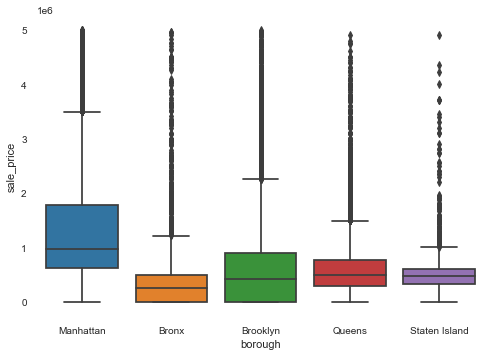

In [ ]:
ny_lowbud = ny[ny.sale_price < 5000000]
sns.boxplot(x='borough', y='sale_price', data=ny_lowbud)

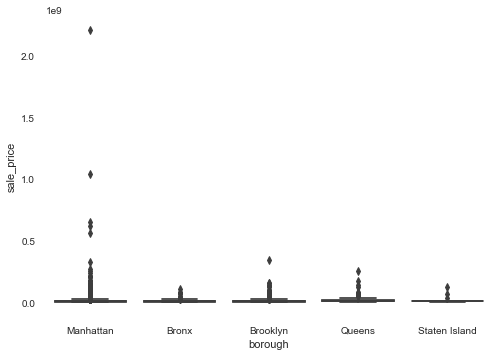

In [ ]:
ny_highbud = ny[(ny.sale_price > 5000000)]
sns.boxplot(x='borough', y='sale_price', data=ny_highbud)

In [ ]:
ny_highbud[['sale_date']][ny_highbud.sale_price > 35000000].groupby(ny_highbud['borough']).count()

NameError: ignored

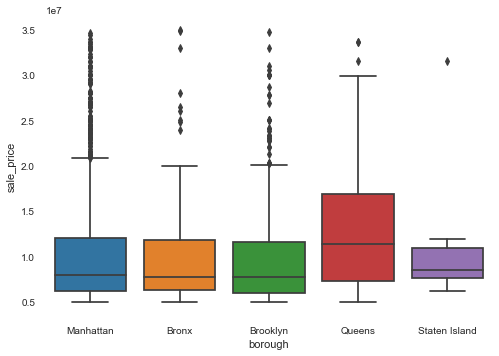

In [ ]:
ny_highbud_ltde = ny[(ny.sale_price > 5000000) & (ny.sale_price < 35000000)]
sns.boxplot(x='borough', y='sale_price', data=ny_highbud_ltde)

#### Será que desses valores, temos muitos zeros?
Precisamos verificar já que valores muito baixos como esses que podem ser fruto de herança, por exemplo, depreciam o valor dos imóveis na região.

In [ ]:
ny_lowbud[['sale_date']][ny_lowbud.sale_price < 20].groupby(ny_lowbud['borough']).count()

,sale_date
borough,
Bronx,1986
Brooklyn,8650
Manhattan,129
Queens,263
Staten Island,108


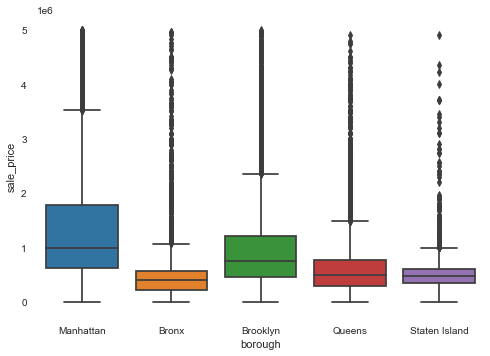

In [ ]:
#vamos criar um recorte para os nossos dados excluindo valores acima de 5MM e abaixo de 20
ny_lowbud_ltde = ny[(ny.sale_price > 20) & (ny.sale_price < 5000000)]
sns.boxplot(x='borough', y='sale_price', data=ny_lowbud_ltde)

#### Essa visualização explica onde estão os quartis e os outliers dos preços por cada região.
Mas esses não são os únicos fatores que influenciam os preços. Temos ainda o tamanho e o tipo de imóveis.

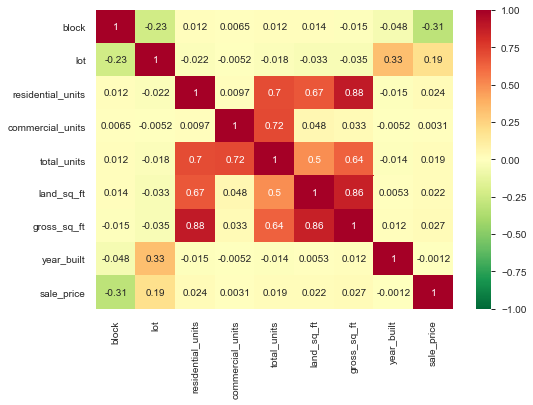

In [ ]:
sns.heatmap(ny_lowbud_ltde.corr(), annot=True, vmin=-1, vmax=1, cmap='RdYlGn_r')

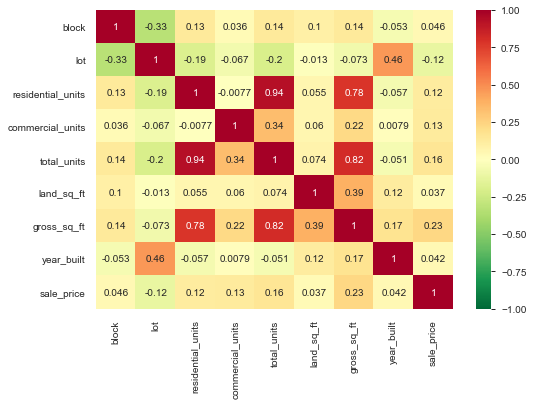

In [ ]:
sns.heatmap(ny_highbud_ltde.corr(), annot=True, vmin=-1, vmax=1, cmap='RdYlGn_r')